# **Capstone Two: Airline Bookings, Data and Behavior Analysis**

### Problem Statement
    In an increasingly competitive airline industry, understanding passenger behavior and preferences is paramount for airlines to optimize operations, enhance customer satisfaction, and maximize revenue. The purpose of this project aims to investigate and analyze whether there are discernable patterns of passenger demand based on factors such as flight duration, country of origin, route, and length of stay to optimize flight scheduling and resource allocation. We also aim to examine primary drivers of passenger satisfaction to further understand customer profiling – how the airline industry can leverage insights into preferences for extra baggage, in -flight meals, and preferred seating to enhance the overall passenger experience and loyalty.

    By addressing these objectives, this study aims to provide the airline industry with actionable insights to enhance operational efficiency, improve customer satisfaction, and maximize revenue generation by effectively leveraging passenger data and preferences. 

## Data Cleansing

In [22]:
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
print(airline_df.info())
print(airline_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_passengers                50000 non-null  int64  
 1   sales_channel                 50000 non-null  object 
 2   trip_type                     50000 non-null  object 
 3   purchase_lead                 50000 non-null  int64  
 4   length_of_stay                50000 non-null  int64  
 5   flight_hour                   50000 non-null  int64  
 6   flight_day                    50000 non-null  object 
 7   route                         50000 non-null  object 
 8   booking_origin                50000 non-null  object 
 9   wants_extra_baggage           50000 non-null  int64  
 10  wants_preferred_seat          50000 non-null  int64  
 11  wants_in_flight_meals         50000 non-null  int64  
 12  flight_duration               50000 non-null  float64
 13  b

In [32]:
airline_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,wants_extra_baggage_string,wants_preferred_seat_string,wants_in_flight_meals_string
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,Yes,No,No
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,No,No,No
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,Yes,Yes,No
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,No,No,Yes
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,Yes,No,Yes


In [64]:
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
airline_df['first_route'] = airline_df['route'].str.slice(0, 3)
airline_df['second_route'] = airline_df['route'].str.slice(3)
airline_df = airline_df[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
                        'length_of_stay', 'flight_day', 'route', 'first_route', 'second_route', 
                        'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 
                        'wants_in_flight_meals', 'flight_duration', 'booking_complete', 
                        'wants_extra_baggage_string', 'wants_preferred_seat_string', 
                        'wants_in_flight_meals_string']]
airline_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_day,route,first_route,second_route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,wants_extra_baggage_string,wants_preferred_seat_string,wants_in_flight_meals_string
0,2,Internet,RoundTrip,262,19,Sat,AKLDEL,AKL,DEL,New Zealand,1,0,0,5.52,0,Yes,No,No
1,1,Internet,RoundTrip,112,20,Sat,AKLDEL,AKL,DEL,New Zealand,0,0,0,5.52,0,No,No,No
2,2,Internet,RoundTrip,243,22,Wed,AKLDEL,AKL,DEL,India,1,1,0,5.52,0,Yes,Yes,No
3,1,Internet,RoundTrip,96,31,Sat,AKLDEL,AKL,DEL,New Zealand,0,0,1,5.52,0,No,No,Yes
4,2,Internet,RoundTrip,68,22,Wed,AKLDEL,AKL,DEL,India,1,0,1,5.52,0,Yes,No,Yes


### Descriptive Analysis
-	Calculate summary statistics for each variable, including central tendency (mean, median) and dispersion (standard deviation, range)
-	Visualize the distribution of duration of flight, length of stay, and number of passengers using histograms, box plots
-	Explore geographic distribution of passengers by country of origin and route using maps or bar charts

In [25]:
airline_df['flight_day'].value_counts(normalize=True)

Mon    0.16204
Wed    0.15348
Tue    0.15346
Thu    0.14848
Fri    0.13522
Sun    0.13108
Sat    0.11624
Name: flight_day, dtype: float64

In [27]:
airline_df['num_passengers'].value_counts(normalize=True)

1    0.62704
2    0.25608
3    0.05882
4    0.03568
5    0.01122
6    0.00578
7    0.00228
8    0.00178
9    0.00132
Name: num_passengers, dtype: float64

In [35]:
airline_df['booking_origin'].value_counts(normalize=True)

Australia               0.35744
Malaysia                0.14348
South Korea             0.09118
Japan                   0.07770
China                   0.06774
                         ...   
Panama                  0.00002
Tonga                   0.00002
Tanzania                0.00002
Bulgaria                0.00002
Svalbard & Jan Mayen    0.00002
Name: booking_origin, Length: 104, dtype: float64

In [40]:
airline_df['route'].value_counts(normalize=True)

AKLKUL    0.05360
PENTPE    0.01848
MELSGN    0.01684
ICNSIN    0.01602
DMKKIX    0.01488
           ...   
LBUTPE    0.00002
CXRMEL    0.00002
DELKBR    0.00002
KOSSYD    0.00002
MRUXIY    0.00002
Name: route, Length: 799, dtype: float64

In [65]:
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
airline_df['first_route'] = airline_df['route'].str.slice(0, 3)
airline_df['second_route'] = airline_df['route'].str.slice(3)
airline_df['first_route'].value_counts(normalize=True)

DMK    0.07494
ICN    0.07464
MEL    0.06936
DPS    0.05804
AKL    0.05698
        ...   
CSX    0.00008
NRT    0.00004
CXR    0.00002
BTJ    0.00002
URT    0.00002
Name: first_route, Length: 85, dtype: float64

In [66]:
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
airline_df['first_route'] = airline_df['route'].str.slice(0, 3)
airline_df['second_route'] = airline_df['route'].str.slice(3)
airline_df['second_route'].value_counts(normalize=True)

SYD    0.13232
PER    0.09984
MEL    0.08888
TPE    0.08088
OOL    0.05592
        ...   
SWA    0.00006
PDG    0.00002
LBU    0.00002
NRT    0.00002
SRG    0.00002
Name: second_route, Length: 64, dtype: float64

In [28]:
airline_df['wants_in_flight_meals_string'].value_counts(normalize=True)

No     0.57286
Yes    0.42714
Name: wants_in_flight_meals_string, dtype: float64

In [29]:
airline_df['wants_extra_baggage_string'].value_counts(normalize=True)

Yes    0.66878
No     0.33122
Name: wants_extra_baggage_string, dtype: float64

In [31]:
airline_df['wants_preferred_seat_string'].value_counts(normalize=True)

No     0.70304
Yes    0.29696
Name: wants_preferred_seat_string, dtype: float64

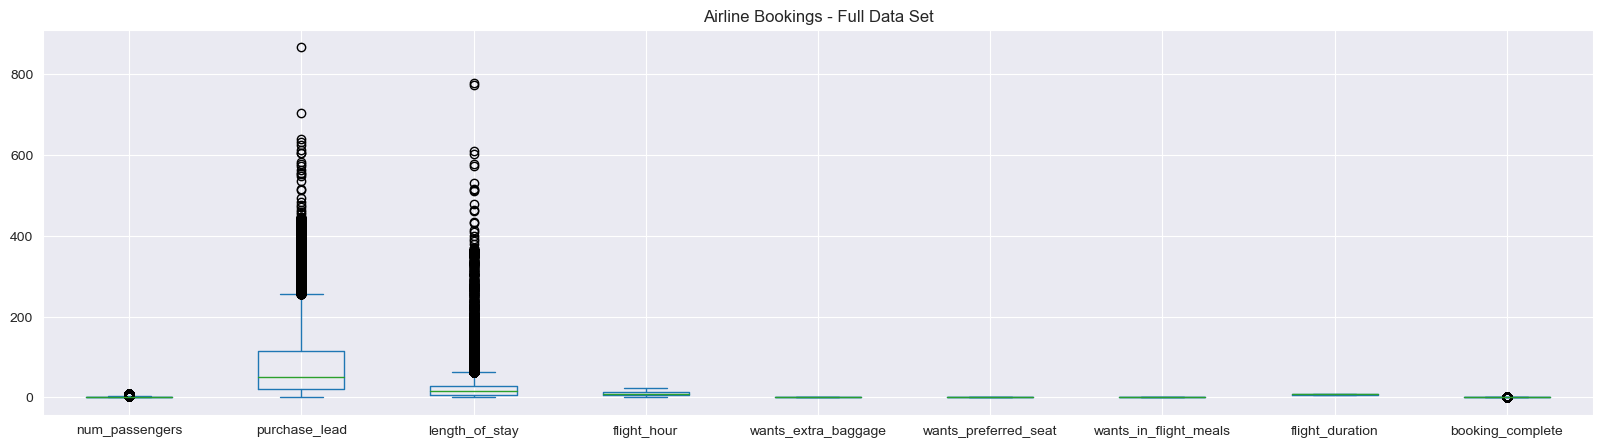

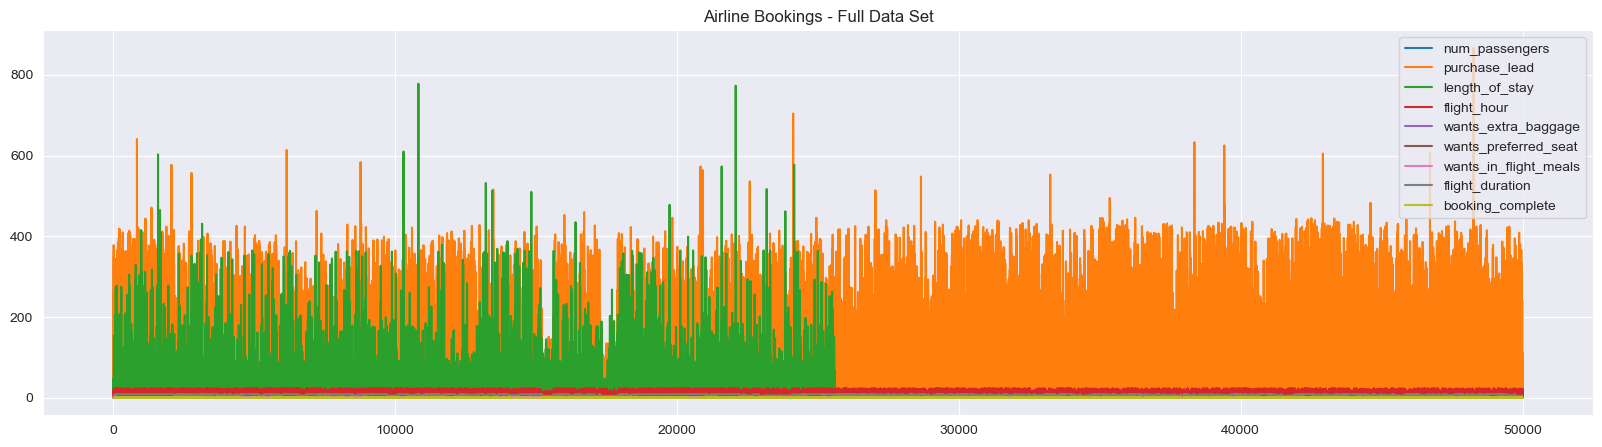

In [113]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
airline_df = pd.read_csv('airline_bookings.csv')
airline_df.plot(kind='box')
plt.title("Airline Bookings - Full Data Set")
airline_df.plot(kind='line')
plt.title("Airline Bookings - Full Data Set")
plt.show()

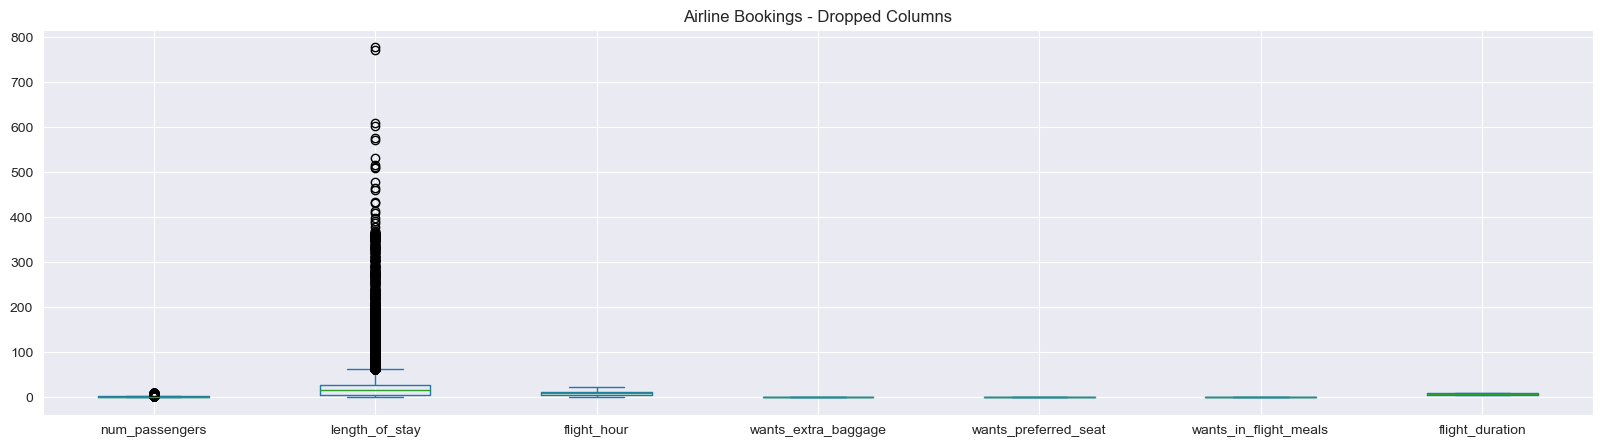

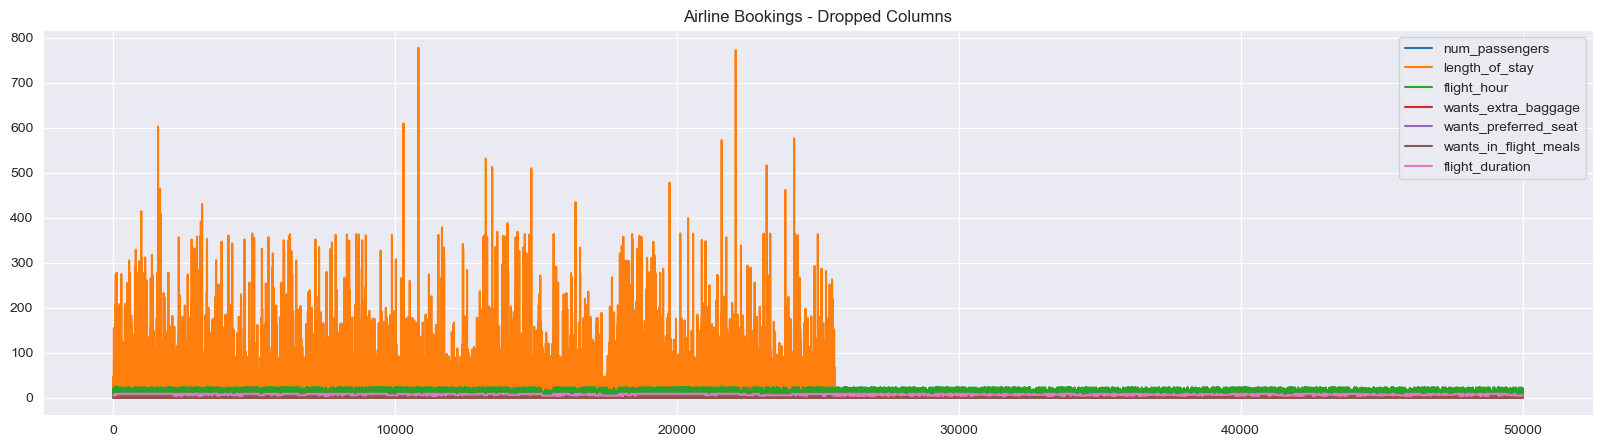

In [114]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
airline_df = pd.read_csv('airline_bookings.csv')
dropped_columns_airline_df = airline_df.drop(columns=["purchase_lead", "booking_complete"])
dropped_columns_airline_df.plot(kind='box')
plt.title("Airline Bookings - Dropped Columns")
dropped_columns_airline_df.plot(kind='line')
plt.title("Airline Bookings - Dropped Columns")
plt.show()

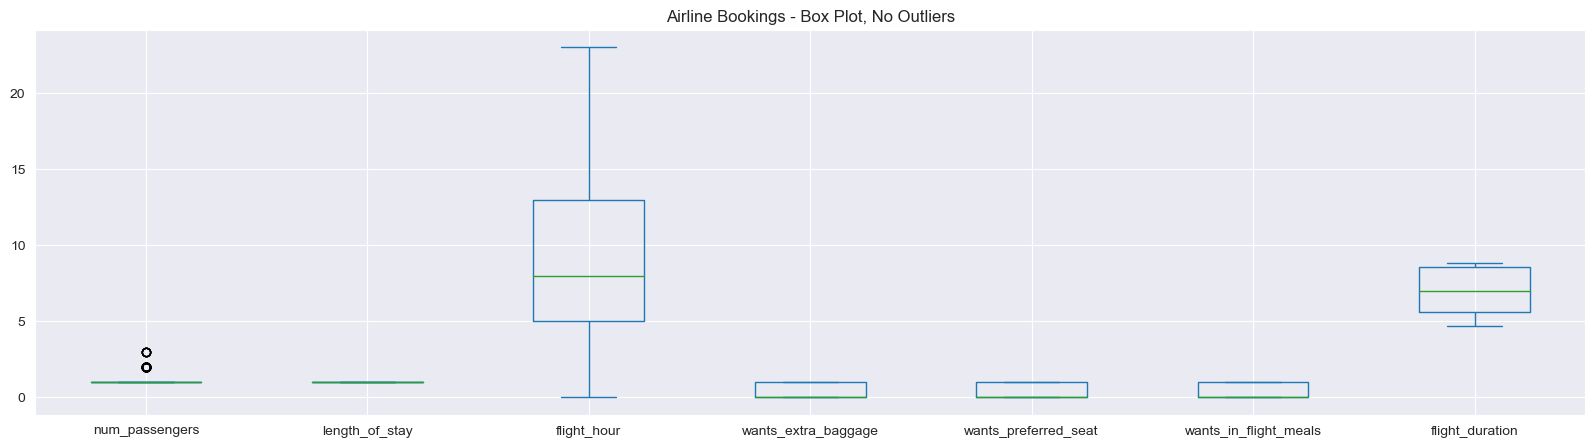

In [152]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)
airline_df = pd.read_csv('airline_bookings.csv')
dropped_columns_airline_df = airline_df.drop(columns=["purchase_lead", "booking_complete"])
Q1 = dropped_columns_airline_df.quantile(.25, axis = 0, numeric_only=True)
Q3 = dropped_columns_airline_df.quantile(.75, axis = 0, numeric_only=True)
IQR = Q3 - Q1
Lower_Limit = Q1 - (1.5 * IQR)
Upper_Limit = Q3 + (1.5 * IQR)
no_outliers = dropped_columns_airline_df[~((dropped_columns_airline_df[IQR.index] < Lower_Limit) | ((dropped_columns_airline_df[IQR.index] > Upper_Limit))).any(axis=1)]
condition_1 = no_outliers["length_of_stay"] == 1
stay_length = no_outliers[condition_1]
stay_length.plot(kind='box')
plt.title("Airline Bookings - Box Plot, No Outliers")
plt.show()

### Correlation Analysis
-	Assess the relationship between variables using correlation analysis
-	Examine correlations between duration of flight, length of stay, and number of passengers to identify potential patterns or dependencies
-	Investigate correlations between in-flight preferences (extra baggage, in -flight meals, preferred seating) and other factors to understand passenger behavior and preferences

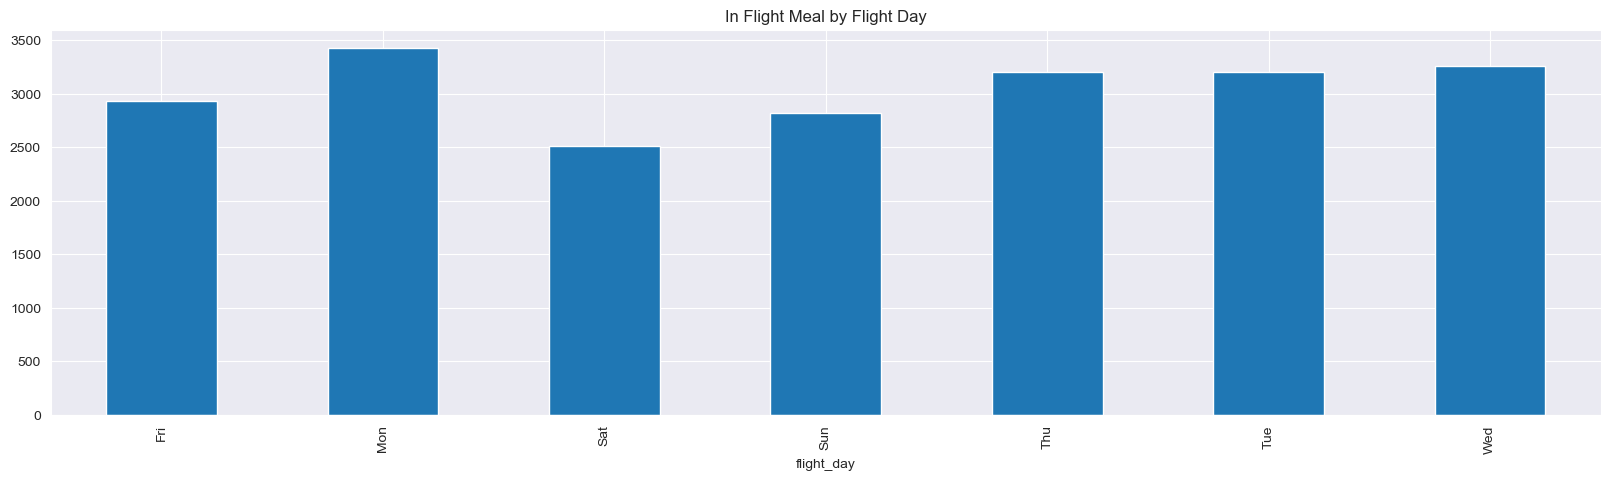

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
in_flight_meal_by_day_of_week = airline_df.groupby("flight_day")["wants_in_flight_meals"].sum()
in_flight_meal_by_day_of_week.plot(kind="bar", title="In Flight Meal by Flight Day")
plt.show()

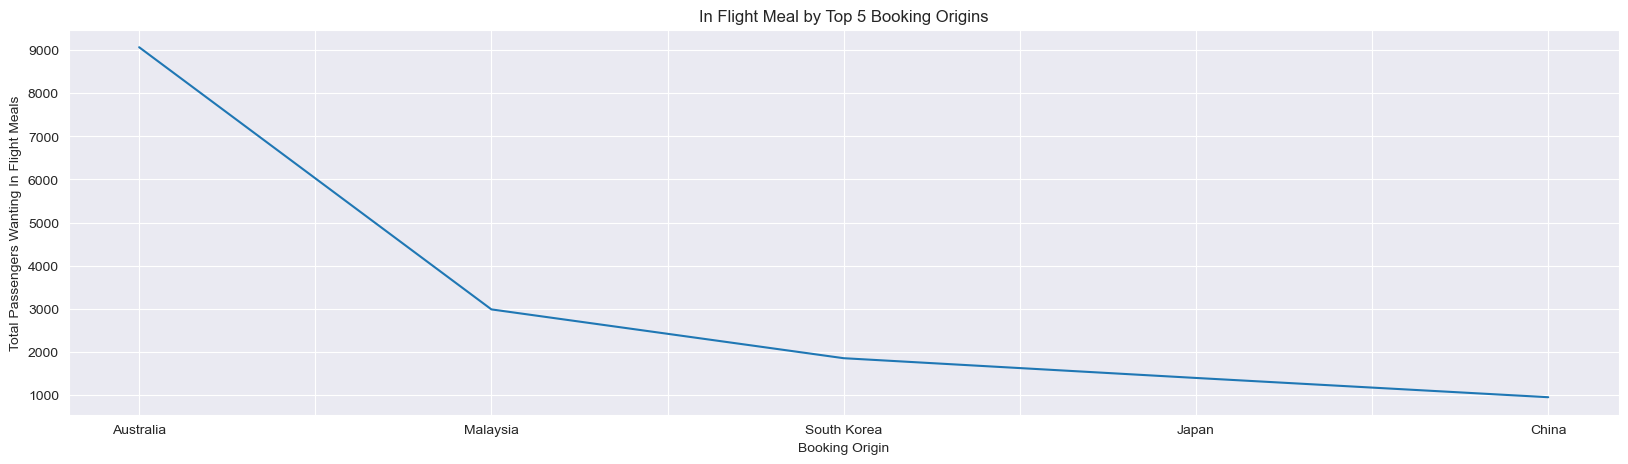

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
in_flight_meal_by_origin = airline_df.groupby("booking_origin")["wants_in_flight_meals"].sum()
booking_origin_top5 = in_flight_meal_by_origin.nlargest(5)
booking_origin_top5.plot(kind="line", title="In Flight Meal by Top 5 Booking Origins")
plt.xlabel("Booking Origin")
plt.ylabel("Total Passengers Wanting In Flight Meals")
plt.show()

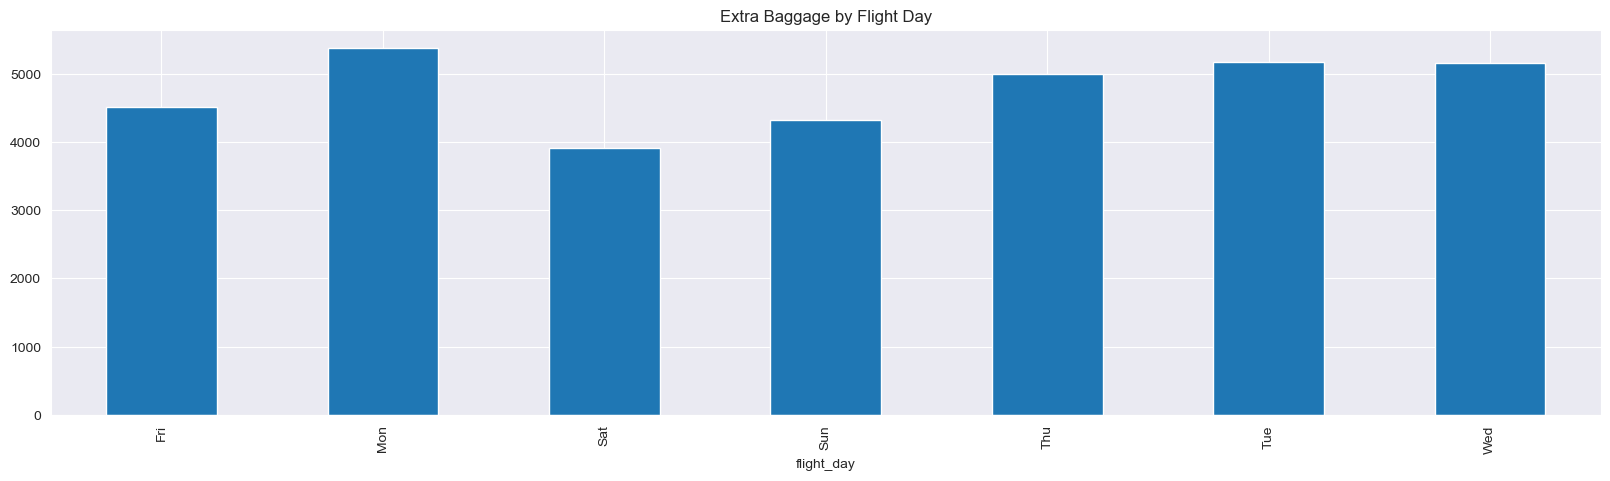

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
in_flight_meal_by_day_of_week = airline_df.groupby("flight_day")["wants_extra_baggage"].sum()
in_flight_meal_by_day_of_week.plot(kind="bar", title="Extra Baggage by Flight Day")
plt.show()

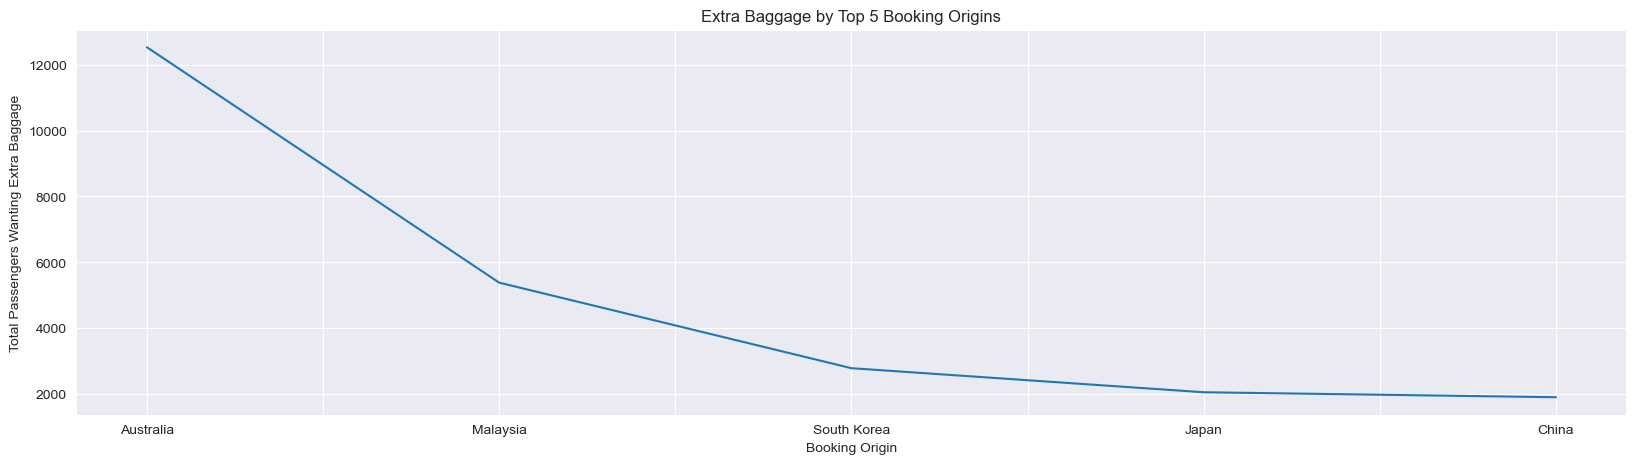

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
extra_baggage_by_origin = airline_df.groupby("booking_origin")["wants_extra_baggage"].sum()
booking_origin_top5 = extra_baggage_by_origin.nlargest(5)
booking_origin_top5.plot(kind="line", title="Extra Baggage by Top 5 Booking Origins")
plt.xlabel("Booking Origin")
plt.ylabel("Total Passengers Wanting Extra Baggage")
plt.show()

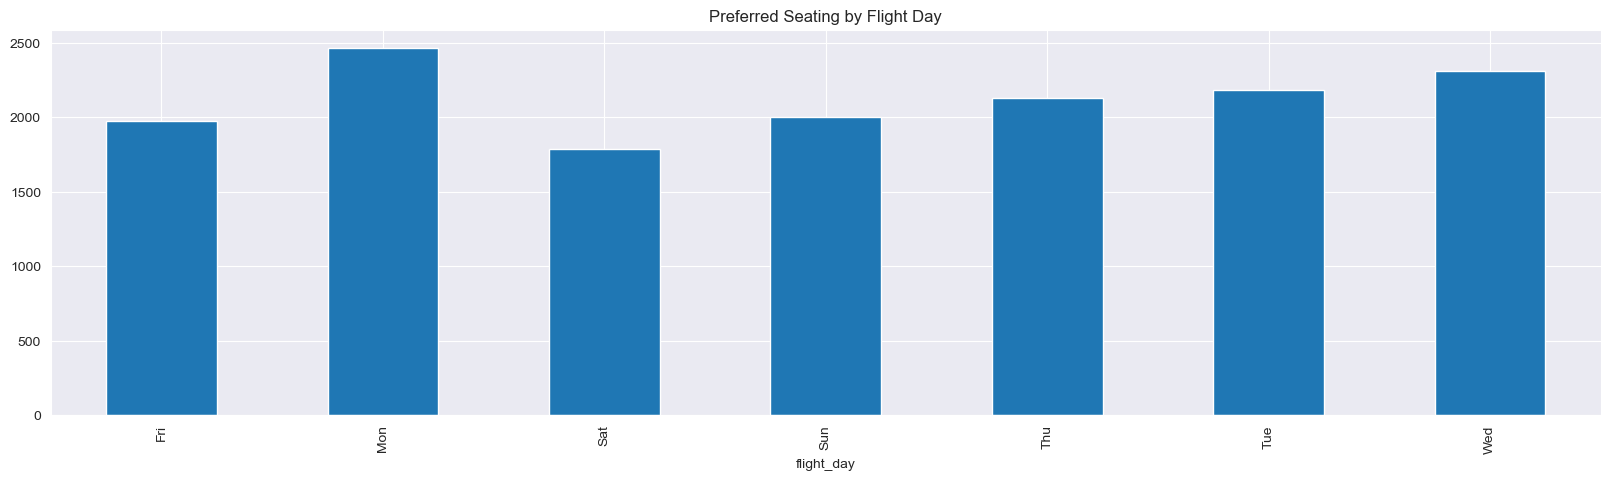

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
in_flight_meal_by_day_of_week = airline_df.groupby("flight_day")["wants_preferred_seat"].sum()
in_flight_meal_by_day_of_week.plot(kind="bar", title="Preferred Seating by Flight Day")
plt.show()

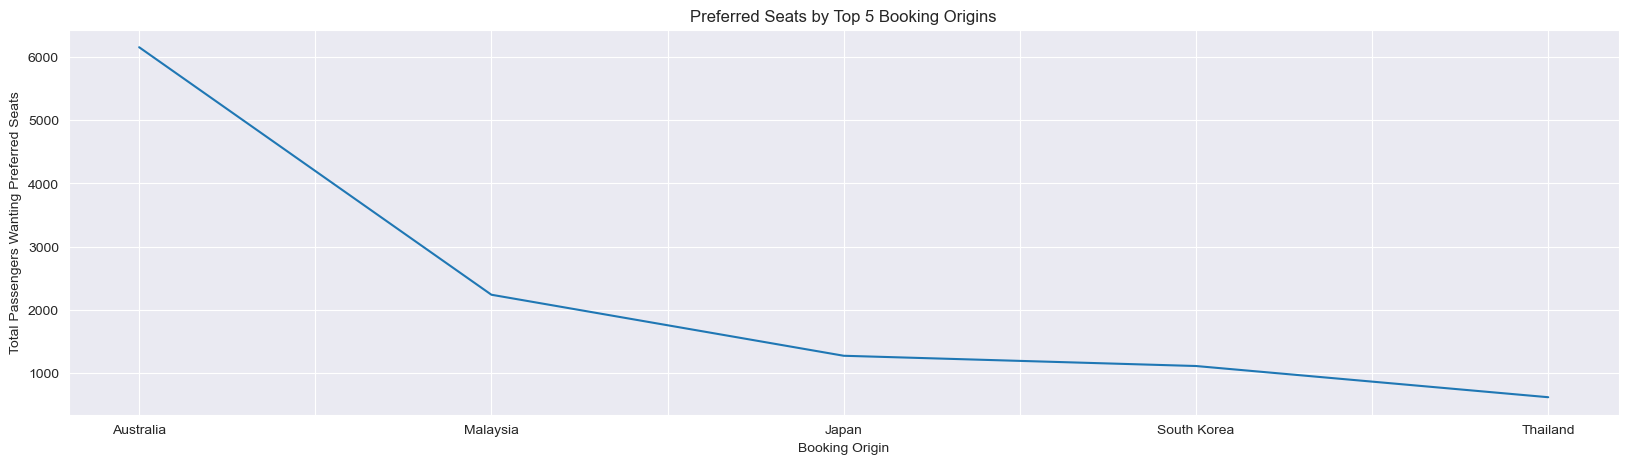

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
preferred_seat_by_origin = airline_df.groupby("booking_origin")["wants_preferred_seat"].sum()
booking_origin_top5 = preferred_seat_by_origin.nlargest(5)
booking_origin_top5.plot(kind="line", title="Preferred Seats by Top 5 Booking Origins")
plt.xlabel("Booking Origin")
plt.ylabel("Total Passengers Wanting Preferred Seats")
plt.show()

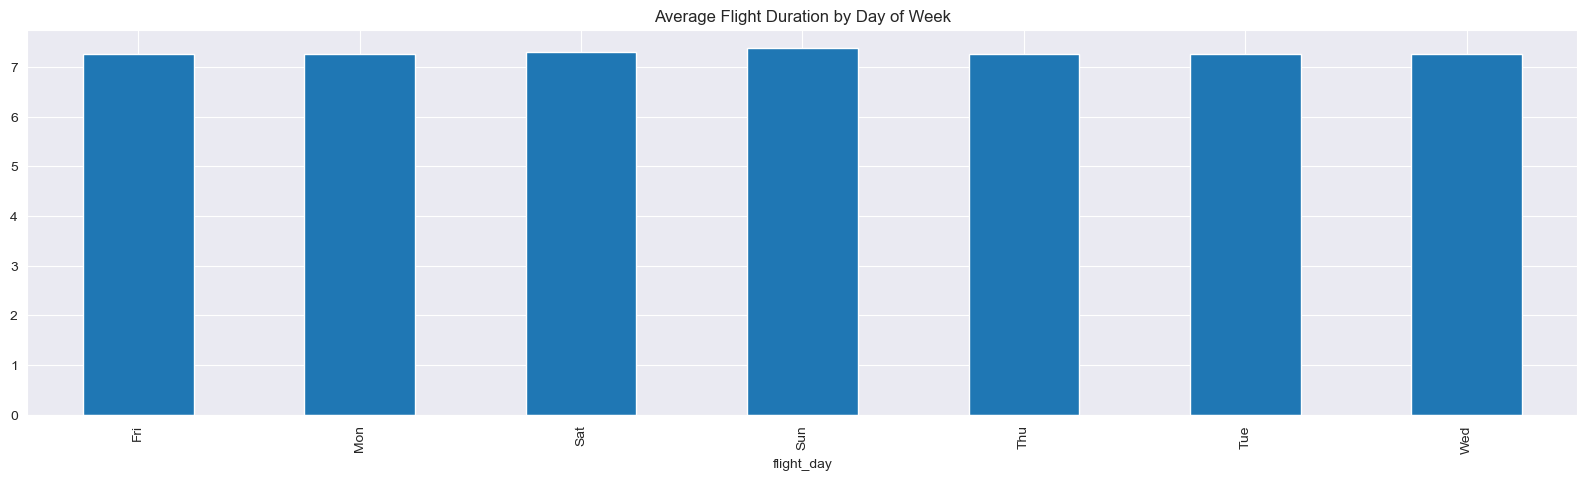

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
avg_flight_duration_by_booking_origin = airline_df.groupby('flight_day')['flight_duration'].mean()
avg_flight_duration_by_booking_origin.plot(kind="bar", title="Average Flight Duration by Day of Week")
plt.show()

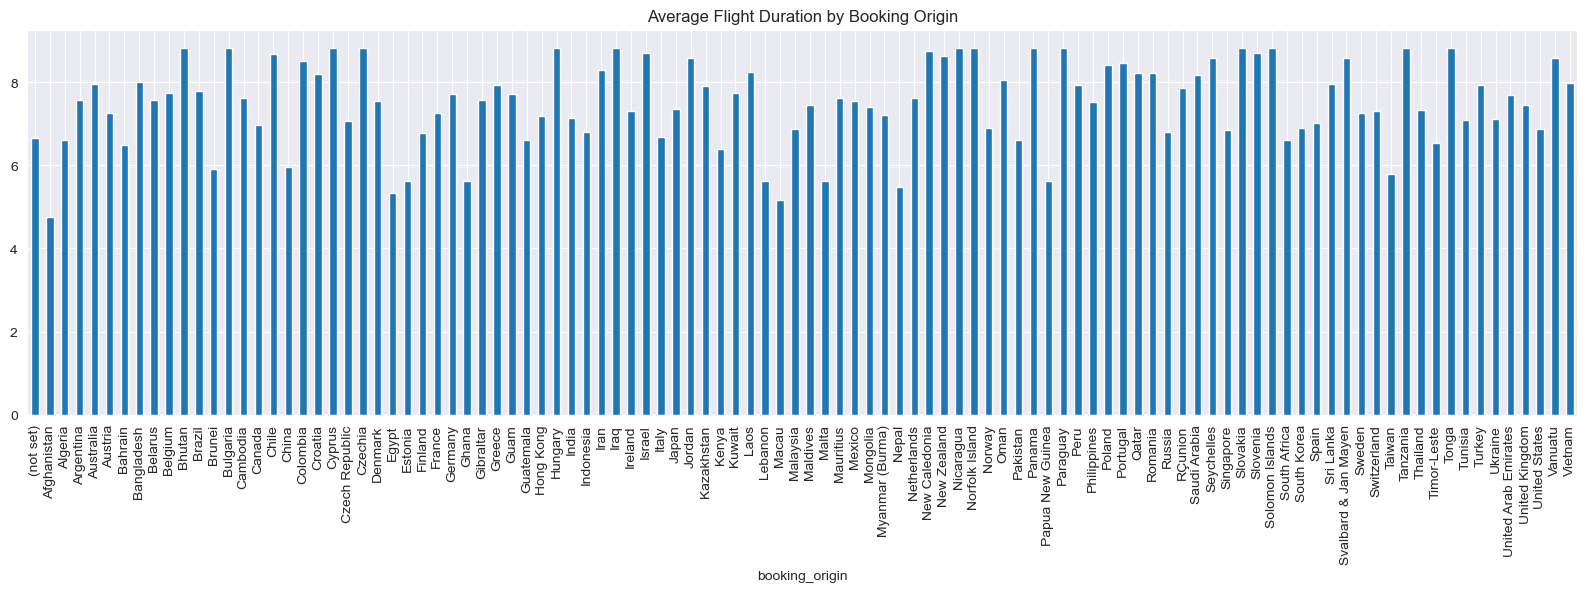

In [116]:
import matplotlib.pyplot as plt
import pandas as pd
airline_df = pd.read_csv('airline_bookings.csv')
avg_flight_duration_by_booking_origin = airline_df.groupby('booking_origin')['flight_duration'].mean()
avg_flight_duration_by_booking_origin.plot(kind="bar", title="Average Flight Duration by Booking Origin")
plt.show()

### Inferential Statistics

-	Develop predictive models to forecast duration of flight, day of week traveled, and passenger demand based on historical data
-	Use predictive models to simulate scenarios and assess the potential impact of changes in variables such as flight schedules and in -flight offerings

In [151]:
import pandas as pd
from scipy import stats
airline_df = pd.read_csv('airline_bookings.csv')
flight_duration_mon = airline_df[airline_df['flight_day'] == 'Mon']['flight_duration']
flight_duration_tue = airline_df[airline_df['flight_day'] == 'Tue']['flight_duration']
flight_duration_wed = airline_df[airline_df['flight_day'] == 'Wed']['flight_duration']
flight_duration_thu = airline_df[airline_df['flight_day'] == 'Thu']['flight_duration']
flight_duration_fri = airline_df[airline_df['flight_day'] == 'Fri']['flight_duration']
flight_duration_sat = airline_df[airline_df['flight_day'] == 'Sat']['flight_duration']
flight_duration_sun = airline_df[airline_df['flight_day'] == 'Sun']['flight_duration']
t_statistics = {}
p_values = {}
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(len(days)):
    for j in range(i + 1, len(days)):
        day1 = days[i]
        day2 = days[j]
        t_statistic, p_value = stats.ttest_ind(airline_df[airline_df['flight_day'] == day1]['flight_duration'],
                                               airline_df[airline_df['flight_day'] == day2]['flight_duration'])
        t_statistics[(day1, day2)] = t_statistic
        p_values[(day1, day2)] = p_value
for (day1, day2), t_statistic in t_statistics.items():
    p_value = p_values[(day1, day2)]
    print(f"T-statistic for {day1} vs {day2}: {t_statistic}")
    print(f"P-value for {day1} vs {day2}: {p_value}")
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis: There is significant difference in mean flight duration between {day1} and {day2}.")
    else:
        print(f"Fail to reject the null hypothesis: There is no significant difference in mean flight duration between {day1} and {day2}.")
    

T-statistic for Mon vs Tue: 0.2843395545640687
P-value for Mon vs Tue: 0.7761539089223176
Fail to reject the null hypothesis: There is no significant difference in mean flight duration between Mon and Tue.
T-statistic for Mon vs Wed: 0.1578095399832418
P-value for Mon vs Wed: 0.8746089010026206
Fail to reject the null hypothesis: There is no significant difference in mean flight duration between Mon and Wed.
T-statistic for Mon vs Thu: 0.632222610165759
P-value for Mon vs Thu: 0.5272507356136624
Fail to reject the null hypothesis: There is no significant difference in mean flight duration between Mon and Thu.
T-statistic for Mon vs Fri: 0.6045546762556321
P-value for Mon vs Fri: 0.5454841591450356
Fail to reject the null hypothesis: There is no significant difference in mean flight duration between Mon and Fri.
T-statistic for Mon vs Sat: -1.487709330568474
P-value for Mon vs Sat: 0.13685023020505963
Fail to reject the null hypothesis: There is no significant difference in mean flight 

### Insights and Recommendations
-	Summarize key findings and insights from the data analysis, including trends, correlations, and segmentation results
-	Provide actionable recommendations for airlines to optimize operations, enhance customer satisfaction, and maximize revenue based on the analysis findings
-	Highlight areas for further research or data collection to deepen understanding and improve decision -making in the airline industry